<a href="https://colab.research.google.com/github/atmendes/Python-For-Data-Analytics-Class/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
from scipy.stats import chi2_contingency 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/atmendes/Python-For-Data-Analytics-Class/main/NYPD_Arrest_Data__Year_to_Date_.csv")

In [ ]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,238942621,01/10/2022,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,9,0,18-24,M,WHITE,987058,203626,40.725583,-73.989869,POINT (-73.98986919 40.72558254)
1,238980679,01/11/2022,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402000,F,Q,101,0,25-44,M,WHITE,1052353,159425,40.604001,-73.754742,POINT (-73.754742 40.604001)
2,239553009,01/23/2022,464.0,JOSTLING,230.0,JOSTLING,PL 1652501,M,Q,110,1,25-44,M,BLACK,1027679,214505,40.755336,-73.843245,POINT (-73.84324519 40.75533648)
3,239651234,01/25/2022,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,71,0,25-44,M,BLACK,998742,181235,40.664121,-73.947765,POINT (-73.9477648403751 40.664121282631)
4,241524225,03/03/2022,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,84,0,18-24,M,BLACK,988902,192641,40.695439,-73.983225,POINT (-73.9832253756043 40.6954388081238)


In [ ]:
df.shape

(140564, 19)

In [ ]:
df.dtypes

ARREST_KEY                    int64
ARREST_DATE                  object
PD_CD                       float64
PD_DESC                      object
KY_CD                       float64
OFNS_DESC                    object
LAW_CODE                     object
LAW_CAT_CD                   object
ARREST_BORO                  object
ARREST_PRECINCT               int64
JURISDICTION_CODE             int64
AGE_GROUP                    object
PERP_SEX                     object
PERP_RACE                    object
X_COORD_CD                    int64
Y_COORD_CD                    int64
Latitude                    float64
Longitude                   float64
New Georeferenced Column     object
dtype: object

In [ ]:
df.isnull().sum()

ARREST_KEY                     0
ARREST_DATE                    0
PD_CD                        376
PD_DESC                        0
KY_CD                        379
OFNS_DESC                      0
LAW_CODE                       0
LAW_CAT_CD                  1362
ARREST_BORO                    0
ARREST_PRECINCT                0
JURISDICTION_CODE              0
AGE_GROUP                      0
PERP_SEX                       0
PERP_RACE                      0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
New Georeferenced Column       0
dtype: int64

In [ ]:
#Check number of arrests per Borough

In [ ]:
df['ARREST_BORO'].value_counts(sort=False)

M    34588
Q    29353
K    38067
B    32309
S     6247
Name: ARREST_BORO, dtype: int64

In [ ]:
#rename the Boro

In [ ]:
df['ARREST_BORO'].replace(['M','K','S','Q','B'],['MANHATTAN','BROOKLYN','STATEN ISLAND', 'QUEENS', 'Bronx'],inplace=True)

In [ ]:
df['ARREST_BORO'].value_counts(sort=False)

MANHATTAN        34588
QUEENS           29353
BROOKLYN         38067
Bronx            32309
STATEN ISLAND     6247
Name: ARREST_BORO, dtype: int64

In [ ]:
#Split the Month Day and Year into different variables

In [ ]:
df[["Month","Day","Year_Arrested"]] = df['ARREST_DATE'].str.split("/",expand=True)

In [ ]:
df.head(5)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,Month,Day,Year_Arrested
0,238942621,01/10/2022,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,MANHATTAN,9,...,M,WHITE,987058,203626,40.725583,-73.989869,POINT (-73.98986919 40.72558254),01,10,2022
1,238980679,01/11/2022,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402000,F,QUEENS,101,...,M,WHITE,1052353,159425,40.604001,-73.754742,POINT (-73.754742 40.604001),01,11,2022
2,239553009,01/23/2022,464.0,JOSTLING,230.0,JOSTLING,PL 1652501,M,QUEENS,110,...,M,BLACK,1027679,214505,40.755336,-73.843245,POINT (-73.84324519 40.75533648),01,23,2022
3,239651234,01/25/2022,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,BROOKLYN,71,...,M,BLACK,998742,181235,40.664121,-73.947765,POINT (-73.9477648403751 40.664121282631),01,25,2022
4,241524225,03/03/2022,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,BROOKLYN,84,...,M,BLACK,988902,192641,40.695439,-73.983225,POINT (-73.9832253756043 40.6954388081238),03,03,2022


In [ ]:
#counts by month

In [ ]:
df['Month'].value_counts()

03    16940
05    16552
06    16403
04    16079
09    15804
07    15792
08    15734
02    14070
01    13190
Name: Month, dtype: int64

In [ ]:
#Check Column Names

In [ ]:
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column',
       'Month', 'Day', 'Year_Arrested'],
      dtype='object')

In [ ]:
#Create new set with just variables needed for analysis

In [ ]:
df2 = df[['ARREST_KEY','Month','AGE_GROUP','PERP_SEX','PERP_RACE','OFNS_DESC', 'ARREST_BORO', 'LAW_CAT_CD']]

In [ ]:
df2.head(20)

,ARREST_KEY,Month,AGE_GROUP,PERP_SEX,PERP_RACE,OFNS_DESC,ARREST_BORO,LAW_CAT_CD
0,238942621,01,18-24,M,WHITE,ASSAULT 3 & RELATED OFFENSES,MANHATTAN,M
1,238980679,01,25-44,M,WHITE,BURGLARY,QUEENS,F
2,239553009,01,25-44,M,BLACK,JOSTLING,QUEENS,M
3,239651234,01,25-44,M,BLACK,RAPE,BROOKLYN,F
4,241524225,03,18-24,M,BLACK,RAPE,BROOKLYN,F
5,241038267,02,45-64,M,BLACK,RAPE,Bronx,F
6,240817075,02,<18,M,BLACK,SEX CRIMES,BROOKLYN,M
7,241020842,02,25-44,M,BLACK,(null),QUEENS,9
8,241455354,03,45-64,M,BLACK,FELONY ASSAULT,BROOKLYN,F
9,242619627,03,25-44,M,BLACK,BURGLARY,Bronx,F


In [ ]:
#Check offenses

In [ ]:
df2['OFNS_DESC'].value_counts()

ASSAULT 3 & RELATED OFFENSES      23188
PETIT LARCENY                     15288
FELONY ASSAULT                    14190
MISCELLANEOUS PENAL LAW            9327
CRIMINAL MISCHIEF & RELATED OF     7717
                                  ...  
NEW YORK CITY HEALTH CODE             2
PARKING OFFENSES                      2
UNLAWFUL POSS. WEAP. ON SCHOOL        1
ADMINISTRATIVE CODES                  1
DISRUPTION OF A RELIGIOUS SERV        1
Name: OFNS_DESC, Length: 65, dtype: int64

In [ ]:
#Create new set with only Felonies

In [ ]:
df3 = df2[(df2['LAW_CAT_CD'] == 'F')]

In [ ]:
#Create new set with top three felony offenses

In [ ]:
df4 = df3[df3['OFNS_DESC'].isin (['FELONY ASSAULT','ROBBERY', 'GRAND LARCENY'])]

In [ ]:
df4.head()

In [ ]:
#Check counts by month

In [ ]:
df4['Month'].value_counts()

09    3422
06    3336
08    3296
07    3215
05    3207
03    3107
04    3000
02    2728
01    2621
Name: Month, dtype: int64

In [ ]:
#Check offense counts by three of the felony types

In [ ]:
df4['OFNS_DESC'].value_counts()

FELONY ASSAULT    14190
ROBBERY            7310
GRAND LARCENY      6432
Name: OFNS_DESC, dtype: int64

In [ ]:
#Check number arrests per boro by month

In [ ]:
df4.c

Month  ARREST_BORO  
01     BROOKLYN          759
       Bronx             585
       MANHATTAN         641
       QUEENS            551
       STATEN ISLAND      85
02     BROOKLYN          721
       Bronx             655
       MANHATTAN         711
       QUEENS            561
       STATEN ISLAND      80
03     BROOKLYN          879
       Bronx             725
       MANHATTAN         824
       QUEENS            571
       STATEN ISLAND     108
04     BROOKLYN          816
       Bronx             665
       MANHATTAN         828
       QUEENS            597
       STATEN ISLAND      94
05     BROOKLYN          830
       Bronx             707
       MANHATTAN         906
       QUEENS            653
       STATEN ISLAND     111
06     BROOKLYN          844
       Bronx             815
       MANHATTAN         839
       QUEENS            712
       STATEN ISLAND     126
07     BROOKLYN          875
       Bronx             738
       MANHATTAN         837
       QUEENS         

In [ ]:
#Create a variable and include all variables

In [ ]:
categorical_col= ['Month','AGE_GROUP','PERP_SEX','PERP_RACE','OFNS_DESC', 'ARREST_BORO', 'LAW_CAT_CD']

In [ ]:
print(categorical_col)

['Month', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'OFNS_DESC', 'ARREST_BORO', 'LAW_CAT_CD']


In [ ]:
#Create a contingency table for all months and offenses

In [ ]:
chisqt = pd.crosstab(df4.Month, df4.OFNS_DESC, margins=True)
print(chisqt)

OFNS_DESC  FELONY ASSAULT  GRAND LARCENY  ROBBERY    All
Month                                                   
01                   1335            565      721   2621
02                   1348            621      759   2728
03                   1519            751      837   3107
04                   1547            658      795   3000
05                   1648            714      845   3207
06                   1728            726      882   3336
07                   1695            705      815   3215
08                   1729            750      817   3296
09                   1641            942      839   3422
All                 14190           6432     7310  27932


In [ ]:
# Need this below for chi sqaure

In [ ]:
value = np.array([chisqt.iloc[0][0:5].values,chisqt.iloc[1][0:5].values])

In [ ]:
#This below did not work. I was trying to create a new variable for cold, moderate, hot weather

In [ ]:
def func(x):
  if 'Month'=='01':
    return 'Cold Weather'
  elif 'Month'=='02':
    return 'Cold Weather'
  elif 'Month'=='03':
    return 'Cold Weather'
  elif 'Month'=='04':
    return 'Moderate Weather'
  elif 'Month'=='05':
    return 'Moderate Weather'
  elif 'Month'=='06':
    return 'Moderate Weather'
  elif 'Month'=='07':
    return 'Hot Weather'
  elif 'Month'=='08':
    return 'Hot Weather'
  elif 'Month'=='09':
    return 'Hot Weather'
  

In [ ]:
#Below worked for creating categories

In [ ]:
weather_Month = {'01': 'Cold', '02':'Cold', '03': 'Cold', '04': 'Moderate','05': 'Moderate', '06': 'Moderate', '07': 'Hot','08': 'Hot','09': 'Hot'}

In [ ]:
df5= df4.assign(Season= df4.Month.map(weather_Month))

In [ ]:
categorical_col= ['Month','AGE_GROUP','PERP_SEX','PERP_RACE','OFNS_DESC', 'ARREST_BORO', 'LAW_CAT_CD', 'Season']

In [ ]:
#Use for Cross tab

In [ ]:
chisqt = pd.crosstab(df5.Season, df5.OFNS_DESC, margins=True)

In [ ]:
#Contingency table for my chi sqaure test

In [ ]:
print(chisqt)

OFNS_DESC  FELONY ASSAULT  GRAND LARCENY  ROBBERY    All
Season                                                  
Cold                 4202           1937     2317   8456
Hot                  5065           2397     2471   9933
Moderate             4923           2098     2522   9543
All                 14190           6432     7310  27932


In [ ]:
Contingency_pct = pd.crosstab(df5['Season'], df5['OFNS_DESC'], normalize='columns')

In [ ]:
#Contingency table by rate

In [ ]:
data_crosstab = pd.crosstab(df5['Season'], df5['OFNS_DESC'], margins= False)

In [ ]:
print(data_crosstab)

OFNS_DESC  FELONY ASSAULT  GRAND LARCENY  ROBBERY
Season                                           
Cold                 4202           1937     2317
Hot                  5065           2397     2471
Moderate             4923           2098     2522


In [ ]:
#(no. of rows – 1) * (no. of columns – 1).
#Hence, the degrees of freedom is (3-1) * (3-1) = 4, 9.488

In [ ]:
stat, p, dof, expected = chi2_contingency(data_crosstab)

In [ ]:
#P value is the significance. 

In [ ]:
p

6.104208808282351e-05

In [ ]:
#According to critical values of the Chi-sqaure distribution with degrees of freedom = "9.488", but our p value was 6.104. That means we accept the null hyothesis
# Felony Crimes do not have a significant relationship with the Weather. 

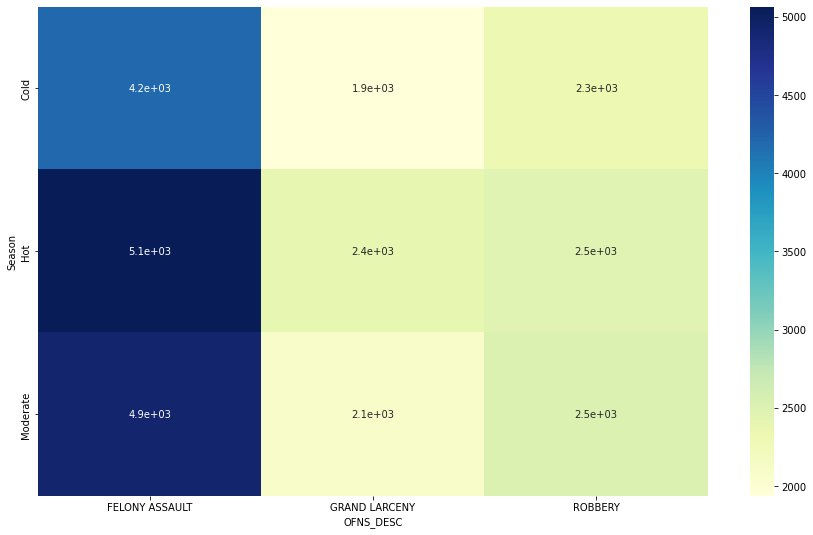

In [ ]:
plt.figure(figsize =(15,9))
sns.heatmap(data_crosstab, annot =True, cmap="YlGnBu")